<h3> Some useful imports</h3>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import gif
from IPython.display import Image
import random
from datetime import datetime
import collections.abc

<h3>Data initialization</h3>

In [12]:
images = random.randint(1000, 100000)
# images = 1000

data_x = random.sample(range(0, 100000), images)
data_y = random.sample(range(0, 100000), images)

cluster_means_x = []
cluster_means_y = []
cluster_nums = []
cluster_colors = []
closest_cluster = []

<h3>Tools for MaxMin algorythm</h3>

In [13]:
import math


def dist(x1, y1, x2, y2):
    return (x1-x2)^2 + (y1-y2)^2

def is_cluster_exist(cluster_num):
    for i in cluster_nums:
        if (i == cluster_num):
            return True
    return False

def add_cluster(cluster_num=-1):
    r = random.random()
    g = random.random()
    b = random.random()
    cluster_colors.append([r,g,b])
    
    if (cluster_num == -1):
        new_cluster_num = -1
        while (new_cluster_num == -1):
            new_cluster_num = random.randint(0, images)
            if (not is_cluster_exist(new_cluster_num)):
                print(cluster_nums)

                cluster_nums.append(new_cluster_num)
                print(cluster_nums)
                cluster_means_x.append(data_x[new_cluster_num])
                cluster_means_y.append(data_y[new_cluster_num])
            else:
                new_cluster_num = -1
    else:
        cluster_nums.append(cluster_num)
        cluster_means_x.append(data_x[cluster_num])
        cluster_means_y.append(data_y[cluster_num])

def average_cores_dist():
    res = 0
    for i in range(0, len(cluster_nums)):
        for j in range(i + 1, len(cluster_nums)):
            res += math.sqrt(dist(data_x[cluster_nums[i]],
                                  data_y[cluster_nums[i]],
                                  data_x[cluster_nums[j]],
                                  data_y[cluster_nums[j]]))
    return res / (len(cluster_nums)*(len(cluster_nums)-1.0)/2.0)
        
@gif.frame
def draw_points(isInitial=False,numIter=0):
    if (isInitial):
        plt.scatter(data_x,
                    data_y,
                    c='#000000',
                    s=1)
    else:
        plt.scatter(data_x, 
                    data_y, 
                    alpha=1, 
                    c=[ cluster_colors[ closest_cluster[i] ] for i in range( images ) ], 
                    s=1)
    plt.scatter(cluster_means_x,
                cluster_means_y,
                marker='*',
                s=300)
    plt.title(f"Iteration no. {numIter}")

<h3>Core of MaxMin algorythm</h3>

In [14]:
startDt = datetime.now()
print(f"Started at {startDt}")

frames = [draw_points(isInitial=True)]

# determine first core randomly
add_cluster()

#determine second core as the most far image
max_dist = -1
max_num = -1
for i in range(images):
    d = dist(cluster_means_x[0], cluster_means_y[0], data_x[i], data_y[i])
    if (d > max_dist):
        max_dist = d
        max_num = i
add_cluster(max_num)


frames.append(draw_points(isInitial=True, numIter = 0))

iteration = 0
flag = True


while (flag):
    iteration += 1
    
    # determine class of each non-core image
    closest_cluster = []
    for p in range(images):
        tmp = np.argmin( [ dist(cluster_means_x[j], 
                                cluster_means_y[j], 
                                data_x[p], 
                                data_y[p]) for j in range(len(cluster_nums)) ] )
        if (isinstance(tmp, collections.abc.Sequence)):
            tmp = tmp[0]
        closest_cluster.append(tmp)
    frames.append(draw_points(numIter=iteration))
    
    # determine max dist between core and images in each class
    cluster_max_dist = []
    cluster_max_dist_num = []

    
    for i in cluster_nums:
        m_dist = -1
        m_num = -1
        for j in range(images):
            if (cluster_nums[closest_cluster[j]] == i):
                d = dist(data_x[i], 
                         data_y[i],
                         data_x[j],
                         data_y[j] )
                if (d > m_dist):
                    m_dist = d
                    m_num = j
        cluster_max_dist.append( m_dist )
        cluster_max_dist_num.append( m_num )
        
    
    # determine new core candidat
    delta_index = np.argmax( cluster_max_dist )
    if (isinstance(delta_index, collections.abc.Sequence)):
        delta_index = delta_index[0]
        
    delta = cluster_max_dist_num[delta_index]
    delta_dist = math.sqrt(abs(cluster_max_dist[delta_index]))
    
    if (delta_dist >= (average_cores_dist() / 2.0) ):
        add_cluster(delta)
        frames.append(draw_points(numIter=iteration))
    else:
        flag = False        

# draw final clusterization
closest_cluster = []
for p in range(images):
    closest_cluster.append( np.argmin( [ dist(cluster_means_x[j], 
                                              cluster_means_y[j], 
                                              data_x[p], 
                                              data_y[p]) for j in range(len(cluster_nums)) ] ) )
frames.append(draw_points(numIter=iteration))


endDt = datetime.now()
print(f"Ended at {endDt}")
print(f"Time spent: {endDt-startDt}")
print(f"Total iterations: {iteration}")
print(f"Images: {images}, cores: {len(cluster_nums)}")

Started at 2023-04-04 12:13:24.854420
[]
[39936]
Ended at 2023-04-04 12:13:59.673569
Time spent: 0:00:34.819149
Total iterations: 7
Images: 83514, cores: 8


<h3>Final Visualization</h3>

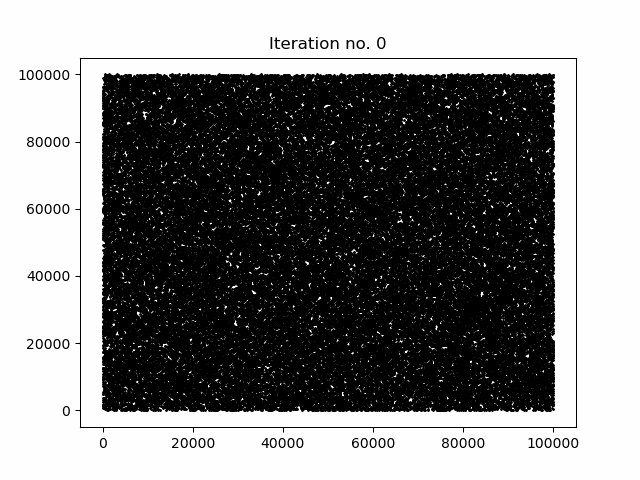

KeyboardInterrupt: 

In [15]:
gif.save(frames, "k_means.gif", duration=300)
Image(filename="k_means.gif")



In [8]:
print("hello")

hello
